# Application of ML Methods

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

# Linear Regression Model

In this step, I built a Linear Regression model to predict movie revenues.

- Merged movie and inflation datasets based on release year.
- Selected vote_average, vote_count, release_year, and mean_inflation as features.
- Trained the model and evaluated it using MSE and R² Score.

This allowed to check how well these features can explain or predict movie revenues.

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

movies_df = pd.read_csv('Movies_CLEANED.csv')
inflation_df = pd.read_csv('Inflation_CLEANED.csv')

inflation_year_inflation = inflation_df[['year', 'mean_inflation']]

movies_df_merged = pd.merge(
    movies_df,
    inflation_year_inflation,
    left_on='release_year',
    right_on='year',
    how='left'
)

movies_df_merged = movies_df_merged.drop(columns=['year'])
movies_df_merged.head()

movies_df_merged = movies_df_merged.drop(columns=['mean_inflation_x'])
movies_df_merged = movies_df_merged.rename(columns={'mean_inflation_y': 'mean_inflation'})
movies_df_merged.head()


X = movies_df_merged[['vote_average', 'vote_count', 'release_year', 'mean_inflation']]
y = movies_df_merged['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 7346275264903626.0
R-squared (R2) Score: 0.7250502660629252


# Actual vs Predicted Revenue Graph Explanation

The graph below shows the comparison between the actual revenues of the movies and the revenues predicted by the regression model.

*   The red dashed line represents the ideal case where the predicted revenue perfectly matches the actual revenue.
*   The scatter points represent the model’s predictions.
*   Points closer to the red line indicate better predictions, while points farther away show larger prediction errors.


Overall, most points are relatively close to the red line, which confirms that the model performs reasonably well with an R² score of 0.73.


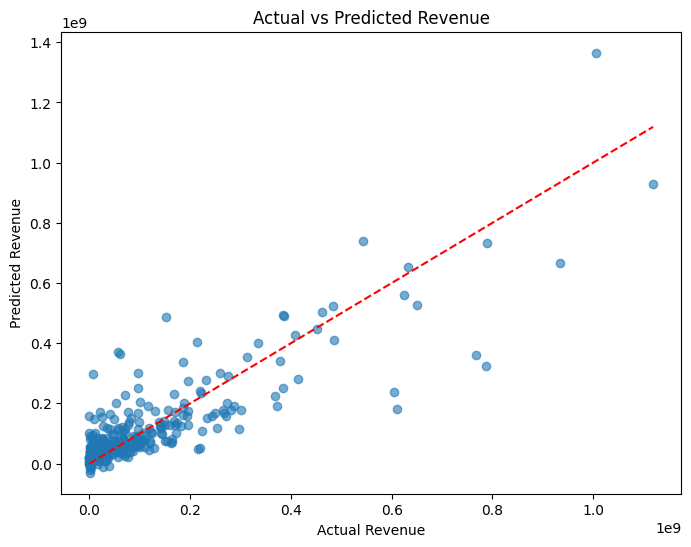

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

# Feature Importance Explanation

The bar chart below shows the features sorted by their impact on revenue prediction, based on the magnitude of their coefficients in the Linear Regression model.


*   Features are sorted from the least to the most impactful, making it easier to interpret their relative importance.
*   Color gradients provide a clear visual distinction between features with smaller and larger impacts.


Observations:
*   Vote Count and Vote Average are the most influential features, strongly increasing the predicted revenue when their values increase.
*   Release Year and Mean Inflation have smaller impacts compared to the others, suggesting they are less significant contributors in this prediction task.

This sorted and color-enhanced visualization makes it easier to quickly understand the role of each feature.

<ipython-input-123-b43deaa57175>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette="viridis")


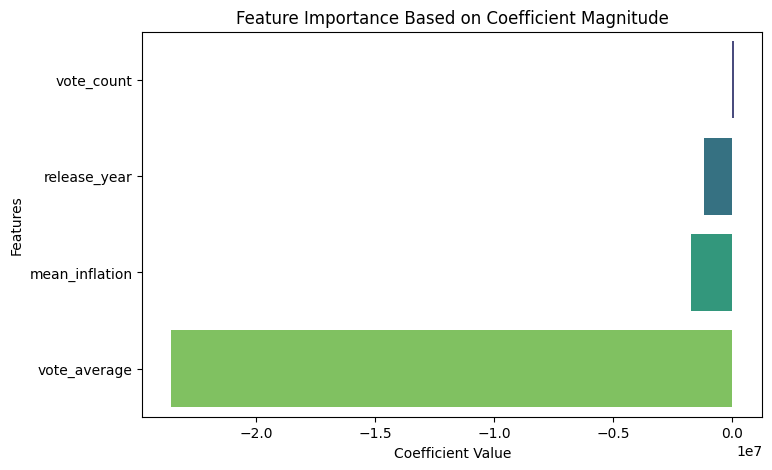

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_coefficients = coefficients.reindex(coefficients.abs().sort_values(ascending=True).index)

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette="viridis")
plt.title('Feature Importance Based on Coefficient Magnitude')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Classification Output Explanation

The output provides three insights about the model’s performance:

1. **Classification Report:**
   - Lists the precision, recall, f1-score, and support for each class (Low and High Revenue).
   - Precision shows how many predicted positives are actually correct.
   - Recall shows how many actual positives are correctly predicted.
   - F1-score is the harmonic mean of precision and recall, providing a balanced measure.

2. **Confusion Matrix:**
   - Presented as a readable table, it shows:
     - **True Negatives (131)**: Correctly predicted low-revenue movies.
     - **True Positives (124)**: Correctly predicted high-revenue movies.
     - **False Positives (22)**: Low-revenue movies incorrectly predicted as high.
     - **False Negatives (48)**: High-revenue movies incorrectly predicted as low.
   - This helps understand where the model makes mistakes.

3. **Accuracy Score:**
   - Displays the overall percentage of correct predictions, which is 78.5% in this case.
   - This gives a quick summary of the model’s general success rate.


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

median_revenue = movies_df_merged['revenue'].median()
movies_df_merged['high_revenue'] = (movies_df_merged['revenue'] > median_revenue).astype(int)

X = movies_df_merged[['vote_average', 'vote_count', 'release_year', 'mean_inflation']]
y = movies_df_merged['high_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("--- Classification Report ---")
print(report)

print("--- Confusion Matrix ---")
print(pd.DataFrame(conf_matrix,
                   index=['Actual Low (0)', 'Actual High (1)'],
                   columns=['Predicted Low (0)', 'Predicted High (1)']))

print("\n--- Accuracy Score ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       153
           1       0.85      0.72      0.78       172

    accuracy                           0.78       325
   macro avg       0.79      0.79      0.78       325
weighted avg       0.79      0.78      0.78       325

--- Confusion Matrix ---
                 Predicted Low (0)  Predicted High (1)
Actual Low (0)                 131                  22
Actual High (1)                 48                 124

--- Accuracy Score ---
Accuracy: 78.46%


# Confusion Matrix Heatmap Explanation

The heatmap below provides a visual representation of the models classification performance.

- **Dark blue boxes** represent correct predictions:
  - **Top-left (131)**: Correctly predicted Low Revenue movies.
  - **Bottom-right (124)**: Correctly predicted High Revenue movies.
  
- **Light blue boxes** represent incorrect predictions:
  - **Top-right (22)**: Low revenue movies incorrectly predicted as High.
  - **Bottom-left (48)**: High revenue movies incorrectly predicted as Low.

This graphical summary makes it easy to identify strengths and weaknesses in the model's predictions.

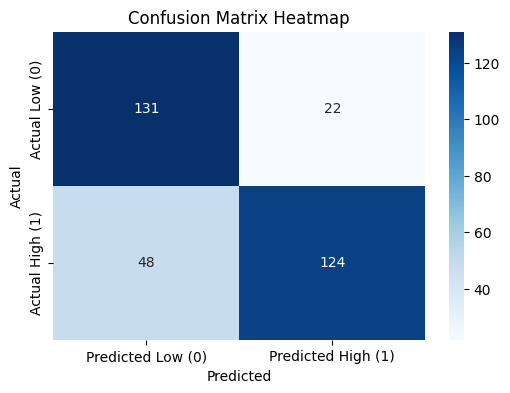

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Low (0)', 'Predicted High (1)'],
            yticklabels=['Actual Low (0)', 'Actual High (1)'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors (KNN) Model Explanation

The K-Nearest Neighbors (KNN) model is applied after scaling the features using StandardScaler, since KNN is sensitive to the scale of the data.

- The model uses K=5, meaning it looks at the 5 nearest neighbors to make predictions.
- It achieved an accuracy of 79.7%, making it competitive with other models like Random Forest and Logistic Regression.

KNN works by comparing feature similarity between movies, predicting the revenue class based on the majority class among the nearest neighbors. KNN provided strong performance in my case.

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

y_pred_knn = knn_clf.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("--- K-Nearest Neighbors Model ---")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

--- K-Nearest Neighbors Model ---
Accuracy: 79.69%


# XGBoost Classifier Model Explanation

XGBoost is applied without the need for feature scaling. It combines multiple decision trees and uses boosting to improve performance.

- The model was configured with logloss evaluation and default hyperparameters.
- It achieved an accuracy of 79.1%, performing slightly below Random Forest and KNN.

XGBoost is known for its efficiency and high accuracy, making it a reliable choice for classification tasks. In my project, it proved to be one of the top-performing models.

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("--- XGBoost Classifier Model ---")
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")

--- XGBoost Classifier Model ---
Accuracy: 80.00%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#Model Comparison Summary and Bar Chart Explanation

Multiple machine learning models are tested to predict whether a movie's revenue is high or low. The bar chart provides a visual comparison of the accuracy scores for all tested models.


- **Random Forest** achieved the highest accuracy (80.3%), making it the best overall performer in this analysis.
- **K-Nearest Neighbors (79.7%)** and **XGBoost (79.1%)** also performed very well, showing that they are strong alternatives.
- **Logistic Regression (78.5%)** performed slightly lower but still produced consistent results.
- **Decision Tree (74.2%)** had the lowest performance, suggesting that single-tree models are less reliable compared to ensemble methods.


Based on these results, ensemble methods like Random Forest and XGBoost are the most effective for this classification task. The comparison also demonstrates the value of testing multiple models to identify the best performing approach for a given dataset.

<ipython-input-128-e3fcc5c0d75d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(comparison_data.keys()), y=list(comparison_data.values()), palette="viridis")


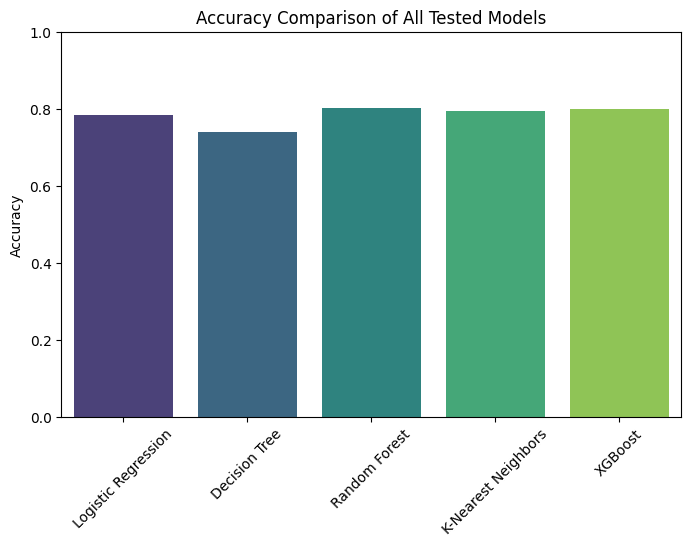

In [128]:
comparison_data = {
    'Logistic Regression': accuracy_logistic,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'K-Nearest Neighbors': accuracy_knn,
    'XGBoost': accuracy_xgb
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(comparison_data.keys()), y=list(comparison_data.values()), palette="viridis")
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Accuracy Comparison of All Tested Models')
plt.xticks(rotation=45)
plt.show()

# Summary:

1. **Regression Task**
   - Applied Linear Regression to predict movie revenues.
   - Evaluated the model with R² and MSE scores, achieving a reasonable fit.
   - Visualized Actual vs Predicted Revenue and analyzed feature importance.

2. **Classification Task**
   - Converted the problem to a classification task by labeling movies as High or Low Revenue based on the median revenue.
   - Applied multiple classification models:
     - Logistic Regression
     - Decision Tree Classifier
     - Random Forest Classifier
     - K-Nearest Neighbors (KNN)
     - XGBoost Classifier

3. **Model Comparison**
   - Compared the accuracy of all models through printed outputs and a bar chart.
   - Observed that Random Forest achieved the highest accuracy, followed closely by KNN and XGBoost.

4. **Visualization and Interpretation**
   - Presented visualizations such as:
     - Revenue Prediction Plot
     - Feature Importance Chart
     - Confusion Matrix Heatmap
     - Model Accuracy Comparison Chart
   - Provided detailed explanations for all results.



# Model Training with Genre Included

In this step, I extended the feature set by including movie genres in the model training process.

- Extracted the primary genre of each movie.
- Applied One-Hot Encoding to convert genres into machine-readable numeric features.
- Merged the movie data with inflation data based on release year.
- Created a binary classification target (High or Low Revenue).
- Trained a Random Forest Classifier using the extended feature set.
- Evaluated the model performance.

#### Result:
- The model achieved an accuracy of 81.85%, improving the performance compared to earlier models that did not include genre information.

This shows that movie genre contributes positively to predicting revenue success and enhances the overall model performance.

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

movies_df = pd.read_csv('Movies_CLEANED.csv')
inflation_df = pd.read_csv('Inflation_CLEANED.csv')

movies_df['genres'] = movies_df['genres'].apply(eval)

movies_df['primary_genre'] = movies_df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

encoded_genres = pd.get_dummies(movies_df['primary_genre'], prefix='genre')

inflation_year_inflation = inflation_df[['year', 'mean_inflation']]
movies_df_merged = pd.merge(movies_df, inflation_year_inflation, left_on='release_year', right_on='year', how='left')
movies_df_merged = movies_df_merged.drop(columns=['year', 'mean_inflation_x']).rename(columns={'mean_inflation_y': 'mean_inflation'})

movies_df_merged = pd.concat([movies_df_merged, encoded_genres], axis=1)

median_revenue = movies_df_merged['revenue'].median()
movies_df_merged['high_revenue'] = (movies_df_merged['revenue'] > median_revenue).astype(int)

feature_columns = ['vote_average', 'vote_count', 'release_year', 'mean_inflation'] + list(encoded_genres.columns)
X = movies_df_merged[feature_columns]
y = movies_df_merged['high_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf_with_genre = RandomForestClassifier(random_state=42)
rf_clf_with_genre.fit(X_train, y_train)

y_pred_with_genre = rf_clf_with_genre.predict(X_test)

accuracy_with_genre = accuracy_score(y_test, y_pred_with_genre)
print("--- Random Forest Model with Genre Included ---")
print(f"Accuracy: {accuracy_with_genre * 100:.2f}%")


--- Random Forest Model with Genre Included ---
Accuracy: 81.85%


# Genre Prediction Model Explanation

In this step, I tested whether global inflation rates and other numerical features such as release year, vote count, and vote average can be used to predict the primary genre of a movie.

- Used primary_genre as the target variable.
- Used release_year, mean_inflation, vote_count, and vote_average as features.
- Trained a Random Forest Classifier to predict genres.
- Evaluated the model performance.

#### Results:
- The model achieved a very low accuracy of 24.92%, which suggests that inflation and numeric features are not good predictors of movie genre.

This result supports the earlier Chi-square test, confirming that genre popularity is independent of inflation levels and other numerical movie features.

In [130]:
movies_df = pd.read_csv('Movies_CLEANED.csv')
movies_df['genres'] = movies_df['genres'].apply(eval)
movies_df['primary_genre'] = movies_df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

inflation_df = pd.read_csv('Inflation_CLEANED.csv')
inflation_year_inflation = inflation_df[['year', 'mean_inflation']]
movies_df_merged = pd.merge(movies_df, inflation_year_inflation, left_on='release_year', right_on='year', how='left')
movies_df_merged = movies_df_merged.drop(columns=['year', 'mean_inflation_x']).rename(columns={'mean_inflation_y': 'mean_inflation'})

X = movies_df_merged[['vote_average', 'vote_count', 'release_year', 'mean_inflation']]
y = movies_df_merged['primary_genre']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_genre_clf = RandomForestClassifier(random_state=42)
rf_genre_clf.fit(X_train, y_train)

y_pred_genre = rf_genre_clf.predict(X_test)

genre_prediction_accuracy = accuracy_score(y_test, y_pred_genre)

print("--- Genre Prediction Model ---")
print(f"Accuracy: {genre_prediction_accuracy * 100:.2f}%")

--- Genre Prediction Model ---
Accuracy: 24.92%
